# <center> South German Credit Data Analysis

Loans form an integral part of banking operations. However, not all the loans are promptly returned and hence it is important for a bank to closely monitter its loan applications.  This project is an analysis of the German credit data. It contains  details of 1000 loan applicants with 21 attributes and the classification whether an applicant is considered a Good or a Bad credit risk. 

In this project, the relationship between the credit risk and various attribues will be explored through basic statistical techniques, Machine Learning Models and presented through visualizations.

**Contents**
1. Import data
2. Data preparation and cleaning
3. Exploration of continues variables
4. Exploration of categorical variables
5. Encoding categorical variables
6. Correlation between the variables
7. Feature engineering
8. Split data in to train and test datasets
9. Machine Learning models - Classification  
    9.1 Logistic Regression   
    9.2 Random Forrest    
    9.3 K-Nearest Neighbors   

# 01. Import Data

In [68]:
# download the data from source
from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')

('german.data', <http.client.HTTPMessage at 0x23bbde84ca0>)

# 02. Data Preparation and Cleaning

The datafile is in .data format, delimited with space, and has no headers.

In [69]:
# load the data into dataframe
import pandas as pd
german_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 
                        delimiter=' ',header=None)

In [70]:
# view the dataset
german_df.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [71]:
# overview of dataset
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


The dataset contains 21 variables and 1000 observatios. 8 variables are of numeric type and 13 of object type. As the object type variables do not have any null values, we can conclude that they are of categorical type. Each row represent a loan customer of the bank and each column represent an attribute of the customer. Hence, we have a set of 1000 customers and 21 attributes dscribing them.  

In [72]:
# download the column labels
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc= f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

In [73]:
# Label the columns
german_df.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'intallment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign','target']

In [74]:
# Replace the column values(account_bal)
german_df= german_df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
                  ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled',
                   'none','car','life_insurance','real_estate'])

In [75]:
german_df

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,none,67,A143,A152,2,skilled,1,A192,A201,1
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,none,22,A143,A152,1,skilled,1,A191,A201,2
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,none,49,A143,A152,1,unskilled,2,A191,A201,1
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,car,45,A143,A153,1,skilled,2,A191,A201,1
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,real_estate,53,A143,A153,2,skilled,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_acc,12,A32,A42,1736,A61,A74,3,A92,A101,...,none,31,A143,A152,1,unskilled,1,A191,A201,1
996,neg_bal,30,A32,A41,3857,A61,A73,4,A91,A101,...,car,40,A143,A152,1,highly_skilled,1,A192,A201,1
997,no_acc,12,A32,A43,804,A61,A75,4,A93,A101,...,life_insurance,38,A143,A152,1,skilled,1,A191,A201,1
998,neg_bal,45,A32,A43,1845,A61,A73,4,A93,A101,...,real_estate,23,A143,A153,1,skilled,1,A192,A201,2


# Exploratory Data Analysis

In [76]:
# import libraries for visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [77]:
# check for missing values
german_df.isna().any().any()

False

In [78]:
# examining distribution of target column
german_df.target.unique()

array([1, 2], dtype=int64)

In [79]:
german_df.target.value_counts()

1    700
2    300
Name: target, dtype: int64

The `target` column has two values:
* 1: representing a good (No Risk) Customers
* 2: representing a bad (Risk) Customers

The usual convention is to use '0' for  good Customers and '1' for bad Customers. Let's replace the values to comply to the convention. 

In [80]:
# import the library for label encoding
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(german_df.target)
german_df.target=le.transform(german_df.target)
german_df.target.head(5)

0    0
1    1
2    0
3    0
4    1
Name: target, dtype: int64

In [81]:
german_df.target.value_counts()

0    700
1    300
Name: target, dtype: int64

In [82]:
german_df.target.count()

1000

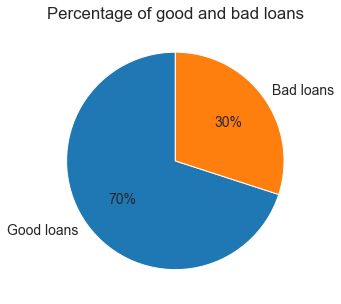

In [83]:
# overview of good and bad loan
good_bad_per=round(((german_df.target.value_counts()/german_df.target.count())*100))
good_bad_per
plt.pie(good_bad_per,labels=['Good loans', 'Bad loans'], autopct='%1.0f%%', startangle=90)
plt.title('Percentage of good and bad loans');

The above pie chart shows that 30% of the loan applicants defaulted. From this information, we see that this is an imbalanced class problem. Hence, we will have to weigh the classes by their representation in the data to reflect this imbalance.

In [84]:
# overview of basic statistical details
german_df[['credit_amount','duration','age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,3271.258000,20.903000,35.546000
std,2822.736876,12.058814,11.375469
min,250.000000,4.000000,19.000000
25%,1365.500000,12.000000,27.000000
50%,2319.500000,18.000000,33.000000
75%,3972.250000,24.000000,42.000000
max,18424.000000,72.000000,75.000000


In [85]:
german_df.credit_amount

0      1169
1      5951
2      2096
3      7882
4      4870
       ... 
995    1736
996    3857
997     804
998    1845
999    4576
Name: credit_amount, Length: 1000, dtype: int64

In [86]:
# calculate Natural logarithm
import numpy as np
german_df['credit_amount']=np.log(german_df['credit_amount'])

In [87]:
german_df.credit_amount

0      7.063904
1      8.691315
2      7.647786
3      8.972337
4      8.490849
         ...   
995    7.459339
996    8.257645
997    6.689599
998    7.520235
999    8.428581
Name: credit_amount, Length: 1000, dtype: float64

In [89]:
german_df[['credit_amount','duration','age']].describe()

,credit_amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,7.788691,20.903000,35.546000
std,0.776474,12.058814,11.375469
min,5.521461,4.000000,19.000000
25%,7.219276,12.000000,27.000000
50%,7.749107,18.000000,33.000000
75%,8.287088,24.000000,42.000000
max,9.821409,72.000000,75.000000


# 03. Exploration of continues variables

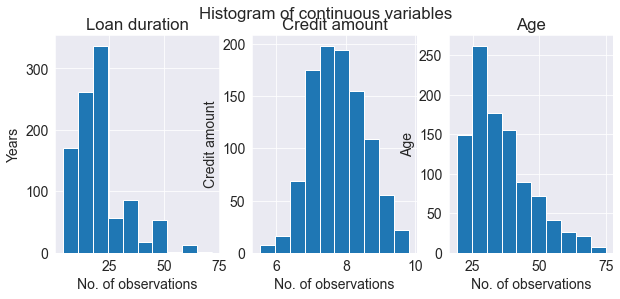

In [90]:
# histograms of continues variables

fig, axes = plt.subplots(1,3, figsize=(10,4))
plt.suptitle('Histogram of continuous variables' )
axes[0].hist(german_df['duration'])
axes[0].set_xlabel('No. of observations')
axes[0].set_ylabel('Years')
axes[0].set_title('Loan duration');

axes[1].hist(german_df['credit_amount'])
axes[1].set_xlabel('No. of observations')
axes[1].set_ylabel('Credit amount')
axes[1].set_title('Credit amount');

axes[2].hist(german_df['age'])
axes[2].set_xlabel('No. of observations')
axes[2].set_ylabel('Age')
axes[2].set_title('Age');

C:\Users\Prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


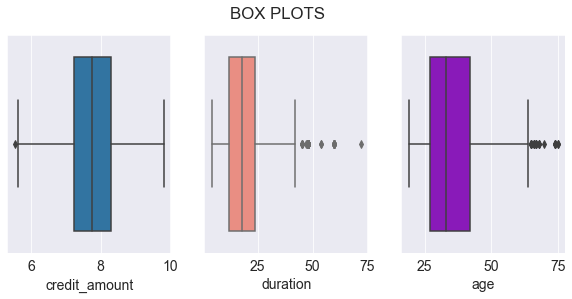

In [91]:
# box-plots of continues variables

fig, ax = plt.subplots(1,3,figsize=(10,4))
plt.suptitle('BOX PLOTS')
sns.boxplot(german_df['credit_amount'], ax=ax[0]);
sns.boxplot(german_df['duration'], ax=ax[1], color='salmon');
sns.boxplot(german_df['age'], ax=ax[2], color='darkviolet');

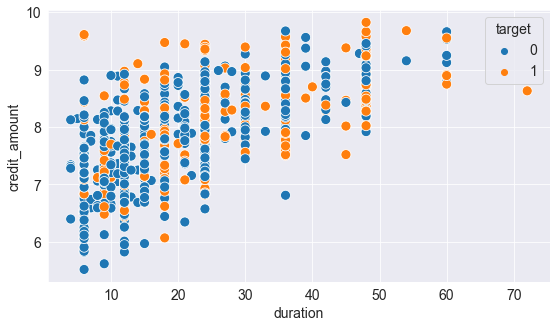

In [92]:
# Relationship between the credit amount and repayment duration
sns.scatterplot(y=german_df.credit_amount, 
                x=german_df.duration, 
                hue=german_df.target, 
                s=100, 
                );

Exploration of continues variables by using Summary statistics, Histograms, Box-plots, Scatter plot

**Observations**

* A glance of the distribution of the continues variables shows that the variables are in different range.
* The histogram suggests that majority of the observations falls in the first quantile of the variable. This can be verified by box-plot.  
* The box plots show that most of the credits amount values are between 1000 to 4500. 
* The credit amount is positively skewed. 
* Most of the loan duration is from 15 to 30 months. 
* Majority of the loan applicants have age between 28 - 43.
* The scatter plot shows that in general, larger loans have longer duration of repayment. Cases where large loans are given with short repayment period have turned out to be bad loans.

# 04. Exploration of categorical variables

<AxesSubplot:ylabel='job'>

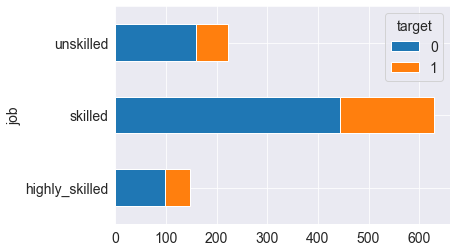

In [93]:
# Relationship between credit risk and skills of loan applicant
german_df.groupby('job')['target'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(6, 4))

Relationship between credit risk and skills of loan applicant by using Bar Chart

**Observations**

The graph shows that candidates who are umeployed/unskilled pose a high risk

<AxesSubplot:xlabel='duration', ylabel='credit_amount'>

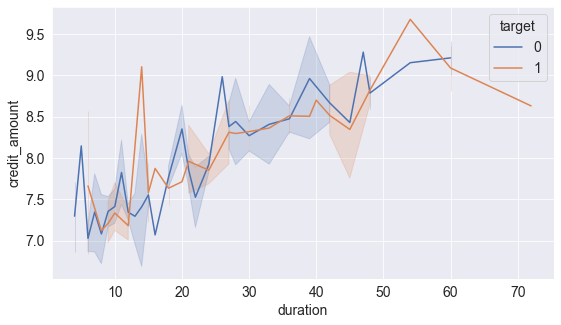

In [94]:
# Relationship between credit amount and duration of the loan
sns.lineplot(data=german_df, x='duration', y='credit_amount', hue='target', palette='deep')

Relationship between credit amount and duration of the loan by using Line Chart

**Observation**

There is a linear relationship between the credit amount and duration. The larger the credit amount, the longer is the repayment duration.

<AxesSubplot:ylabel='most_valuable_asset'>

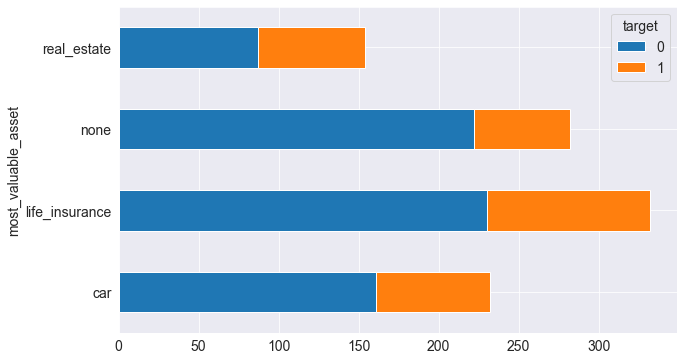

In [95]:
# Relationship between the most valuable asset of the candidate and the credit amount, credit risk
german_df.groupby('most_valuable_asset')['target'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))

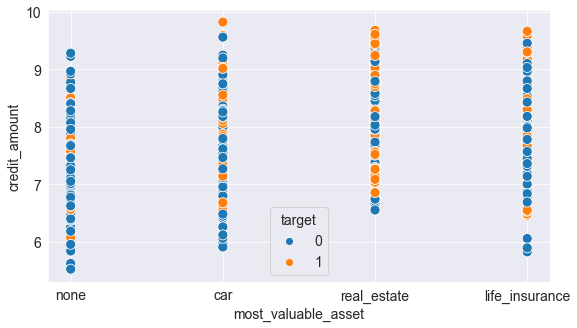

In [96]:
sns.scatterplot(y=german_df.credit_amount, 
                x=german_df.most_valuable_asset, 
                hue=german_df.target, 
                s=100, 
                );

Relationship between the most valuable asset of the candidate and the credit amount, credit risk by using stacked bar chart and scatter plot

The categorical coding used in the graphs is :
    
* A121 : real estate
* A122 : if not A121 : building society savings agreement/life insurance
* A123 : if not A121/A122 : car or other, not in attribute 6
* A124 : unknown / no property

**Observations**

The graphs show that people with real estate assets are very risky.

# 05. Encoding categorical variables

Most machine learning models cannot deal with categorical variables. So we need to encode the 13 categorical variables that we have in the german dataset. 

In [97]:
# Number of unique classes in each object column
german_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

account_bal             3
payment_status          5
purpose                10
savings_bond_value      5
employed_since          5
sex_marital             4
guarantor               3
most_valuable_asset     4
concurrent_credits      3
type_of_housing         3
job                     3
telephon                2
foreign                 2
dtype: int64

We have categorical variables with 2 to 10 categories. We go for Label encoding for variables with only two categories where as for variables with more than two categories, we go for one-hot encoding. In label encoding, we assign each unique category in a categorical variable with an integer. No new columns are created. In one-hot encoding, we create a new column for each unique category in a categorical variable. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).

For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

In [98]:
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in german_df:
    if german_df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(german_df[col].unique())) <= 2:
            # Train on the training data
            le.fit(german_df[col])
            # Transform both training and testing data
            german_df[col] = le.transform(german_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [99]:
# one-hot encoding of categorical variables
german_df = pd.get_dummies(german_df)

print('Encoded Features shape: ', german_df.shape)

Encoded Features shape:  (1000, 58)


In [100]:
german_df

,duration,credit_amount,intallment_rate,residence_since,age,number_of_existcr,number_of_dependents,telephon,foreign,target,...,most_valuable_asset_real_estate,concurrent_credits_A141,concurrent_credits_A142,concurrent_credits_A143,type_of_housing_A151,type_of_housing_A152,type_of_housing_A153,job_highly_skilled,job_skilled,job_unskilled
0,6,7.063904,4,4,67,2,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,48,8.691315,2,2,22,1,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
2,12,7.647786,2,3,49,1,2,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,42,8.972337,2,4,45,1,2,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,24,8.490849,3,4,53,2,2,0,0,1,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,7.459339,3,4,31,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
996,30,8.257645,4,4,40,1,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
997,12,6.689599,4,4,38,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
998,45,7.520235,4,4,23,1,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0


# 06. Correlation between the variables

In [101]:
# Find correlations with the target and sort
correlations = german_df.corr()['target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 sex_marital_A92                    0.075493
type_of_housing_A153               0.081556
account_bal_positive_bal           0.089895
type_of_housing_A151               0.092785
concurrent_credits_A141            0.096510
purpose_A40                        0.096900
employed_since_A72                 0.106397
credit_amount                      0.109570
most_valuable_asset_real_estate    0.125750
payment_status_A31                 0.134448
payment_status_A30                 0.144767
savings_bond_value_A61             0.161007
duration                           0.214927
account_bal_neg_bal                0.258333
target                             1.000000
Name: target, dtype: float64

Most Negative Correlations:
 account_bal_no_acc         -0.322436
payment_status_A34         -0.181713
type_of_housing_A152       -0.134589
savings_bond_value_A65     -0.129238
most_valuable_asset_none   -0.119300
concurrent_credits_A143    -0.113285
purpose_A43                -0.

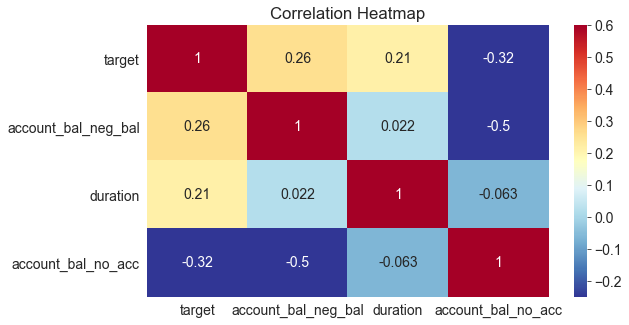

In [102]:
# Extract significantly correlated variables
corr_data = german_df[['target', 'account_bal_neg_bal','duration','account_bal_no_acc']]
corr_data_corrs = corr_data.corr()

# Heatmap of correlations
sns.heatmap(corr_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

**Correlation between the variables**

Let's look at correlations between the features and the target using Pearson correlation coefficient. In this case, a postive correlation represnets correlation with credit default while a negative correlation represnets correlation with credit repayment.

**Observations:**

Positive correlation:
    
* People with checking accounts with a negative balance (`account_bal_A11`) are likely to default the loan. 

* Longer duration loans (`duration`) tends to be defaulted.

Negative correlation:

* People with no checking account (`account_bal_A14`) are likely to repay the loan.

# 07. Feature engineering

Feature engineering refers to creating most useful features out of the data. This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. [[Source]](https://www.featurelabs.com/blog/secret-to-data-science-success/)

Feature engineering refers to a geneal process and can involve both **feature construction**: adding new features from the existing data, and **feature selection**: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

For this problem, we will try to construct polynomial features.

### Polynomial Features
Here, we find interactions between the significant features. The correlation between the interaction features are target are checked.If the interaction features are found to have greater correlation with the target compared to the original features, they are included in the machine learning model as they can help the model learn better. 

In [103]:
# Make a new dataframe for polynomial features
poly_features = german_df[['duration','account_bal_neg_bal','account_bal_no_acc']]
poly_target=german_df['target']

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 2)
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (1000, 10)


This creates a considerable number of new features. To get the names we have to use the polynomial features `get_feature_names` method.

In [104]:
poly_transformer.get_feature_names(input_features = ['duration','account_bal_neg_bal','account_bal_no_acc'])

['1',
 'duration',
 'account_bal_neg_bal',
 'account_bal_no_acc',
 'duration^2',
 'duration account_bal_neg_bal',
 'duration account_bal_no_acc',
 'account_bal_neg_bal^2',
 'account_bal_neg_bal account_bal_no_acc',
 'account_bal_no_acc^2']

Now we can see whether any of these new features are correlated with the target

In [105]:
# Create a dataframe for polynomial features 
poly_features = pd.DataFrame(
    poly_features, columns = poly_transformer.get_feature_names(
        ['duration','account_bal_neg_bal','account_bal_no_acc']))

# Add in the target
poly_features['target'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['target'].sort_values()

# Display the correlations
poly_corrs

account_bal_no_acc                       -0.322436
account_bal_no_acc^2                     -0.322436
duration account_bal_no_acc              -0.232697
duration^2                                0.200996
duration                                  0.214927
account_bal_neg_bal                       0.258333
account_bal_neg_bal^2                     0.258333
duration account_bal_neg_bal              0.303343
target                                    1.000000
1                                              NaN
account_bal_neg_bal account_bal_no_acc         NaN
Name: target, dtype: float64

All the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. 
We will add these features to a copy of the german dataset and then evaluate models with and without the features. 

In [106]:
list(poly_features)

['1',
 'duration',
 'account_bal_neg_bal',
 'account_bal_no_acc',
 'duration^2',
 'duration account_bal_neg_bal',
 'duration account_bal_no_acc',
 'account_bal_neg_bal^2',
 'account_bal_neg_bal account_bal_no_acc',
 'account_bal_no_acc^2',
 'target']

In [107]:
# deleting duplicate columns in poly_features

for i in list(poly_features.columns):
  for j in list(german_df.columns):
    if (i==j):
      poly_features.drop(labels=i, axis=1, inplace=True)

poly_features.drop(labels='1', axis=1, inplace=True)
list(poly_features)

['duration^2',
 'duration account_bal_neg_bal',
 'duration account_bal_no_acc',
 'account_bal_neg_bal^2',
 'account_bal_neg_bal account_bal_no_acc',
 'account_bal_no_acc^2']

In [108]:
# Print shape of original german_df
print('Original features shape: ', german_df.shape)
# Merge polnomial features into the dataframe
german_df_poly = german_df.merge(poly_features, left_index=True, right_index=True, how = 'left')
# Print out the new shapes
print('Merged polynomial features shape: ', german_df_poly.shape)

Original features shape:  (1000, 58)
Merged polynomial features shape:  (1000, 64)


In [109]:
# check any null values in new dataframe
german_df_poly.isna().any().any()

False

# 08. Split data in to train and test datasets

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
#x, y = german_df.drop('target', axis=1), german_df['target']
#x.shape, y.shape

In [114]:
from sklearn.model_selection import train_test_split

x, y = german_df_poly.drop('target', axis=1), german_df_poly['target']
x.shape, y.shape

((1000, 63), (1000,))

In [118]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=42)

In [119]:
x_train.shape, x_test.shape

((700, 63), (300, 63))

In [120]:
# normalize the features to prevent undue influence in the model.
from sklearn.preprocessing import MinMaxScaler

# scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# fit on features dataset
scaler.fit(x_train)
scaler.fit(x_test)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [121]:
x_train

array([[0.29411765, 0.5005394 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.11764706, 0.4815788 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.38235294, 0.64545942, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.76368111, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.11764706, 0.42174197, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.02941176, 0.30511422, 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [122]:
y_train

541    0
440    0
482    0
422    0
778    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: target, Length: 700, dtype: int64

# 09. Machine Learning models - Classification

**Model Evaluation criteria**

Let's have a look at the different options available.

|Evaluation criteria| Description
|:---|---
|Accuracy| (true positive+ true negative) / total obs
|Precision| true positive/ total predicted positive
|Recall| true positive/ total actual positive
|F1 | 2* precision * recall / (precision + recall)
|AUC ROC| Area Under ROC Curve  (TPR Vs. FPR for all classification thresholds)

* Accuracy: The german dataset is an imbalanced dataset. Accuracy would give a high score by predicting the majority class but would fail to predict the minority class, which is the defaulters. Hence, this is not a suitable metric for this dataset.

* Precision: Precision is a good metric when the costs of false positive is high. Example, email spam detection.

* Recall: This metric is suitable when the costs of false negative is high. Example, predicting a defulter as not defaulter. This costs huge loss for the bank. Hence, this is a suitable metric for our case.

* F1: measure of both precision and recall.

* AUC ROC: It is the plot of TPR vs FPR. All other criteria discussed here assumes 0.5 as the decision threshold for the classification. However, it maynot be always true. The AUC helps us evaluate the performance of the model for all classification thresholds. The higher the value of the AUC metric, the better the model.
 * True positive rate (TPR) = TP/ Total actual positive
 * False positive rate (FPR) = FP/ Total actual negative

We will use Recall and AUC ROC as evaluation metric.

In [123]:
import numpy as np
y.value_counts(normalize=True)

0    0.7
1    0.3
Name: target, dtype: float64

It means that the baseline accuracy is 70%, ie, even if we classify all the samples as defaulters, we will be get 70% accurate. 

**Models without tuning**

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [125]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))
models.append(('KNN', KNeighborsClassifier())) 

In [132]:
# evaluate each model in turn
results_recall = []
results_roc_auc= []
results_accuracy= []
results_precision= []
names = []
# recall= tp/ (tp+fn). Best value=1, worst value=0
scoring = ['recall', 'roc_auc', 'accuracy', 'precision']

for name, model in models:
        # split dataset into k folds. use one fold for validation and remaining k-1 folds for training
        skf= StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        # Evaluate a score by cross-validation. Returns array of scores of the model for each run of the cross validation.
        #cv_results = cross_val_score(model, x_train, y_train, cv=skf, scoring=scoring)
        cv_results = cross_validate(model, x_train, y_train, cv=skf, scoring=scoring)
        results_recall.append(cv_results['test_recall'])
        results_roc_auc.append(cv_results['test_roc_auc'])
        results_accuracy.append(cv_results['test_accuracy'])
        results_accuracy.append(cv_results['test_precision'])
        names.append(name)
        msg = "%s :\n recall:%f roc_auc:%f accuracy:%f precision:%f" % (name, cv_results['test_recall'].mean(),
                                                                        cv_results['test_roc_auc'].mean(), 
                                                                        cv_results['test_accuracy'].mean(), 
                                                                        cv_results['test_precision'].mean())
        print(msg)


LR :
 recall:0.429524 roc_auc:0.765361 accuracy:0.732857 precision:0.559595
RF :
 recall:0.396190 roc_auc:0.776649 accuracy:0.755714 precision:0.645017
KNN :
 recall:0.353571 roc_auc:0.690421 accuracy:0.711429 precision:0.522900


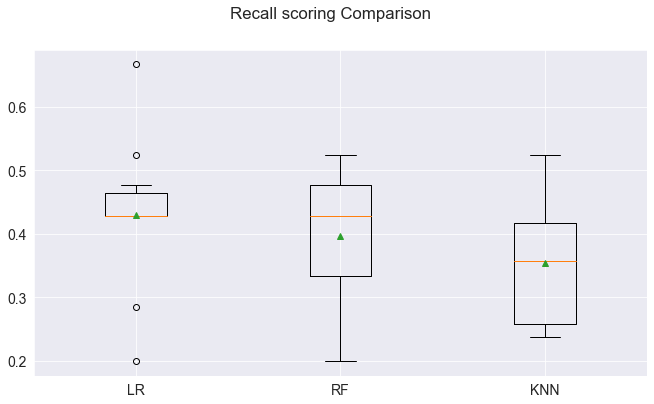

In [133]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Recall scoring Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_recall,showmeans=True)
ax.set_xticklabels(names)
plt.show();



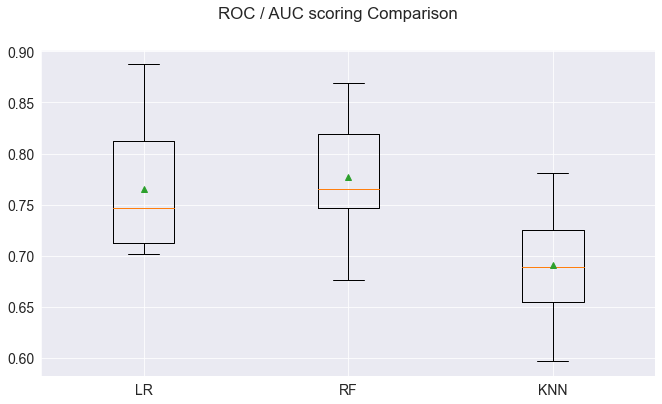

In [149]:
fig = plt.figure(figsize=(11,6))
fig.suptitle('ROC / AUC scoring Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_roc_auc, showmeans=True)
ax.set_xticklabels(names)
plt.show();

In [150]:
# ROC AUC plot
'''from sklearn.metrics import roc_curve, roc_auc_score
results_table = pd.DataFrame(columns = ['models', 'fpr','tpr','auc'])
predictions = {'LR': y_pred_log, 'SVC': y_pred_svc, 'NB': y_pred_nb, 'XGB': y_pred_xgb, 'Stacked': final_predictions}


for i in results_table.index:
    plt.plot(results_table.loc[i]['fpr'], 
             results_table.loc[i]['tpr'], 
             label = "{}, AUC={:.3f}".format(i, results_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color = 'black', linestyle = '--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop = {'size':13}, loc = 'lower right')
plt.show()'''

'from sklearn.metrics import roc_curve, roc_auc_score\nresults_table = pd.DataFrame(columns = [\'models\', \'fpr\',\'tpr\',\'auc\'])\npredictions = {\'LR\': y_pred_log, \'SVC\': y_pred_svc, \'NB\': y_pred_nb, \'XGB\': y_pred_xgb, \'Stacked\': final_predictions}\n\n\nfor i in results_table.index:\n    plt.plot(results_table.loc[i][\'fpr\'], \n             results_table.loc[i][\'tpr\'], \n             label = "{}, AUC={:.3f}".format(i, results_table.loc[i][\'auc\']))\n\nplt.plot([0,1], [0,1], color = \'black\', linestyle = \'--\')\nplt.xticks(np.arange(0.0, 1.1, step=0.1))\nplt.xlabel("False Positive Rate", fontsize=15)\nplt.yticks(np.arange(0.0, 1.1, step=0.1))\nplt.ylabel("True Positive Rate", fontsize=15)\nplt.title(\'ROC Curve Analysis\', fontweight=\'bold\', fontsize=15)\nplt.legend(prop = {\'size\':13}, loc = \'lower right\')\nplt.show()'

LR model has the highest `recall` score. However RF has better accuracy, precision, roc_auc score than LR and KNN. Now let us tune hyperparameters for each of these models.

# 9.1 Logistic Regression

Model Tuning

In [157]:
import time
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

tuned_models_test=[]
tuned_models_train=[]

# Create the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, random_state=42)

start_LR = time.time()

# Train on the training data
log_reg.fit(x_train, y_train)

stop_LR = time.time()

print(f"Training time: {start_LR - stop_LR}s")

y_pred_LR = log_reg.predict(x_test)

meanSquaredError= mean_squared_error(y_test, y_pred_LR)
print("MSE:", meanSquaredError)

rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

r2score = r2_score(y_test, y_pred_LR)
print("R2 Score:", r2score)

Training time: -0.010573863983154297s
MSE: 0.30333333333333334
RMSE: 0.5507570547286103
R2 Score: -0.43540669856459346


In [153]:
# Evaluate on test dataset
recall_test= recall_score(y_test,y_pred_LR)
roc_test=roc_auc_score(y_test,log_reg.predict_proba(x_test)[:, 1])
print('LR',' recall_test:', round(recall_test,2),' auc_roc_test:', round(roc_test,2))
tuned_models_test.append(('LR',' recall_test:', round(recall_test,2),' auc_roc_test:', round(roc_test,2)))

LR  recall_test: 0.0  auc_roc_test: 0.79


In [154]:
# Evaluate on train dataset
roc_train= cross_val_score(log_reg, x_train, y_train, cv=skf, scoring='roc_auc').mean()
recall_train= cross_val_score(log_reg, x_train, y_train, cv=skf, scoring='recall').mean()
print('LR',' recall_train:', round(recall_train,2),' auc_roc_train:', round(roc_train,2))

LR  recall_train: 0.0  auc_roc_train: 0.76


In [297]:
#LR Classification Report
tuned_models_train.append(('LR',' recall_train:', round(recall_train,2),
                           ' auc_roc_train:', round(roc_train,2)))
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       209
           1       0.00      0.00      0.00        91

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.57       300



In [298]:
#from sklearn.metrics import roc_curve
'''
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_LR)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
'''


"\n# Generate ROC curve values: fpr, tpr, thresholds\nfpr, tpr, thresholds = roc_curve(y_test, y_pred_LR)\n# Plot ROC curve\nplt.plot([0, 1], [0, 1], 'k--')\nplt.plot(fpr, tpr)\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.title('ROC Curve')\nplt.show()\n"

Text(0.5, 320.8, 'Predicted label')

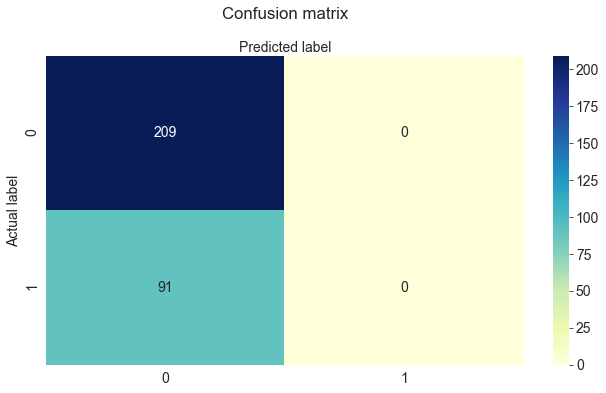

In [299]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix_LR = confusion_matrix(y_test, y_pred_LR)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_LR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [162]:
pd.crosstab(y_test, y_pred_LR, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,209,209
1,91,91
All,300,300


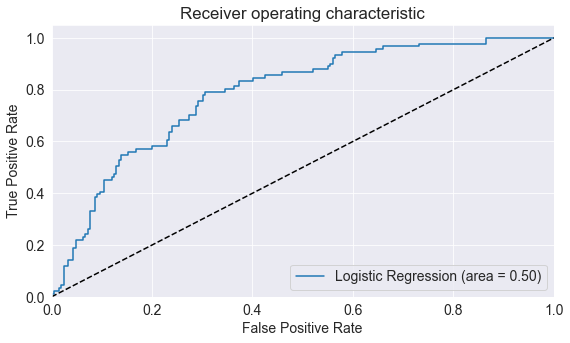

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [165]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,log_reg.predict_proba(x_test)[:,1])                                            

0.7856354172143646

# 09.2 Random Forrest

Model Tuning

In [166]:
# create model with default parameters- baseline
rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train it on the training set
cv_result_baseline= cross_val_score(rf_baseline, x_test, y_test, cv=skf)

# Evalute the results (cross-val)
print("CV accuracy score: {:.2f}%".format(cv_result_baseline.mean() * 100))

CV accuracy score: 72.67%


In [167]:
# train model 
start_RF = time.time()

rf_baseline.fit(x_train, y_train)

stop_RF = time.time()

print(f"Training time: {start_RF - stop_RF}s")

pred_test_rf= rf_baseline.predict(x_test)
print("Test accuracy score: {:.2f}%".format((accuracy_score(pred_test_rf, y_test) * 100)))

meanSquaredError_RF= mean_squared_error(y_test, pred_test_rf)
print("MSE:", meanSquaredError_RF)

rootMeanSquaredError_RF = sqrt(meanSquaredError_RF)
print("RMSE:", rootMeanSquaredError_RF)

r2score_RF = r2_score(y_test, pred_test_rf)
print("R2 Score:", r2score_RF)

Training time: -0.15331268310546875s
Test accuracy score: 75.33%
MSE: 0.24666666666666667
RMSE: 0.496655480858378
R2 Score: -0.16725379883274627


In [564]:
#print("Accuracy:",accuracy_score(y_test, pred_test_rf))

Text(0.5, 320.8, 'Predicted label')

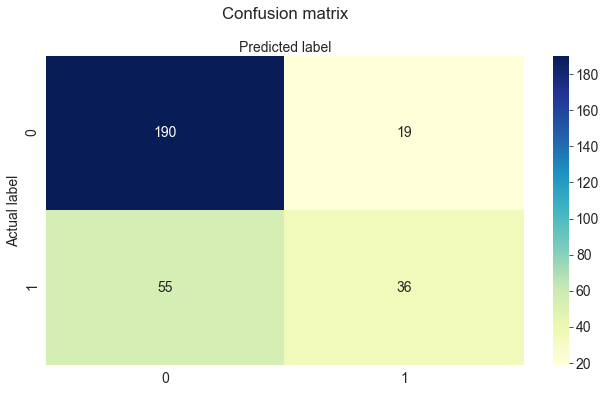

In [169]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
confusion_matrix_RF = confusion_matrix(y_test, pred_test_rf)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [176]:
pd.crosstab(y_test, pred_test_rf, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,190,19,209
1,55,36,91
All,245,55,300


In [177]:
print(classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       209
           1       0.65      0.40      0.49        91

    accuracy                           0.75       300
   macro avg       0.72      0.65      0.67       300
weighted avg       0.74      0.75      0.73       300



In [178]:
y_pred_RF_proba = rf_baseline.predict_proba(x_test)[:,1]


In [173]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF_proba)

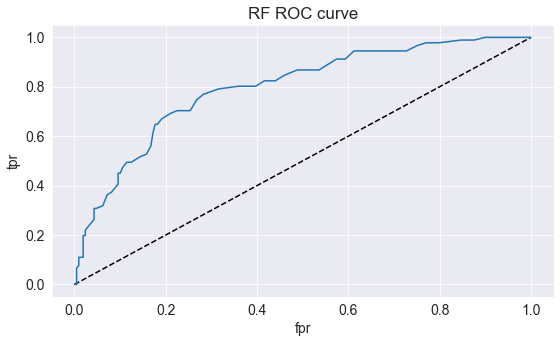

In [174]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='rf_baseline')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('RF ROC curve')
plt.show()

In [179]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_RF_proba)

0.796861033703139

To improve the result. Let's start to tune trees.

In [180]:
# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

In [181]:
for ntrees in trees_grid:
    rf = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1).fit(x_train, y_train)
    temp_train_acc=cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

In [182]:
train_acc, test_acc

([0.7166666666666666,
  0.7166666666666666,
  0.7433333333333334,
  0.7266666666666667,
  0.7233333333333333,
  0.7300000000000001,
  0.7333333333333334,
  0.7266666666666668],
 [0.71,
  0.7233333333333334,
  0.7533333333333333,
  0.7466666666666667,
  0.7433333333333333,
  0.7533333333333333,
  0.76,
  0.7533333333333333])

In [183]:
print("Best CV accuracy is {:.2f}% with {} trees".format(max(test_acc)*100, 
                                            trees_grid[np.argmax(test_acc)]))

Best CV accuracy is 76.00% with 75 trees


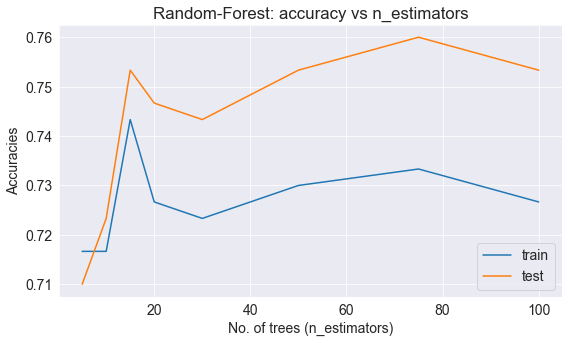

In [184]:
plt.plot(trees_grid, train_acc, label='train')
plt.plot(trees_grid, test_acc, label='test')
plt.legend()
plt.xlabel('No. of trees (n_estimators)')
plt.ylabel('Accuracies')
plt.title('Random-Forest: accuracy vs n_estimators');

In [185]:
# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for max_depth in max_depth_grid:
    rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, 
                                max_depth=max_depth).fit(x_train, y_train)
    temp_train_acc=cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Best CV accuracy is {:.2f}% with {} max_depth".format(max(test_acc)*100, 
                                                        max_depth_grid[np.argmax(test_acc)]))

Best CV accuracy is 76.00% with 20 max_depth


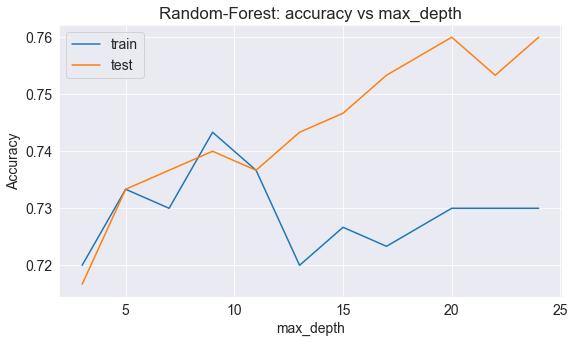

In [186]:
plt.plot(max_depth_grid, train_acc, label='train')
plt.plot(max_depth_grid, test_acc, label='test')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Random-Forest: accuracy vs max_depth');

Best CV accuracy is 75.33% with 1 min_sample_leaf


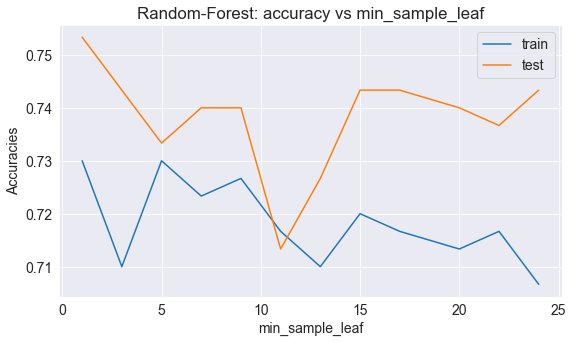

In [187]:
# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]

for min_sample in min_samples_leaf_grid:
    rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, 
                                min_samples_leaf=min_sample).fit(x_train, y_train)
    temp_train_acc=cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Best CV accuracy is {:.2f}% with {} min_sample_leaf".format(max(test_acc)*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc)]))

plt.plot(min_samples_leaf_grid, train_acc, label='train')
plt.plot(min_samples_leaf_grid, test_acc, label='test')
plt.legend()
plt.xlabel('min_sample_leaf')
plt.ylabel('Accuracies')
plt.title('Random-Forest: accuracy vs min_sample_leaf');

Best CV accuracy is 76.67% with 4 max_features


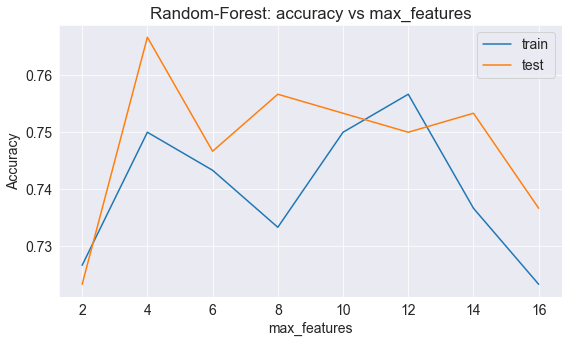

In [188]:
# Create lists to save the values of accuracy on training and test sets
train_acc = []
test_acc = []
temp_train_acc
max_features_grid = [2, 4, 6, 8, 10, 12, 14, 16]

for max_feature in max_features_grid:
    rf = RandomForestClassifier(n_estimators=50, random_state=42, 
                                n_jobs=-1, max_features=max_feature).fit(x_train, y_train)
    temp_train_acc=cross_val_score(rf, x_test, y_test, cv=skf)
    train_acc.append(temp_train_acc.mean())
    test_acc.append(accuracy_score(rf.predict(x_test), y_test))

print("Best CV accuracy is {:.2f}% with {} max_features".format(max(test_acc)*100, 
                                                        max_features_grid[np.argmax(test_acc)]))

plt.plot(max_features_grid, train_acc, label='train')
plt.plot(max_features_grid, test_acc, label='test')
plt.legend()
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Random-Forest: accuracy vs max_features');

In [189]:
from sklearn.model_selection import GridSearchCV

# Initialize the set of parameters for exhaustive search and fit 
parameters = {'max_features': [7, 10, 16, 18], 
              'min_samples_leaf': [1, 3, 5, 7], 
              'max_depth': [15, 20, 24, 27]}
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
gcv = GridSearchCV(rf, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 24, 27],
                         'max_features': [7, 10, 16, 18],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [192]:
gcv.best_params_

{'max_depth': 20, 'max_features': 7, 'min_samples_leaf': 3}

In [193]:
gcv.best_score_

0.7557142857142857

# 09.3 K-Nearest Neighbors

Model Tuning

In [215]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)    
    start_KNN = time.time()    
    #Fit the model
    knn.fit(x_train, y_train)    
    stop_KNN = time.time()
   # print(f"Training time: {start_KNN - stop_KNN}s")    
    y_pred_KNN = knn.predict(x_test)      
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
meanSquaredError= mean_squared_error(y_test, y_pred_KNN)
print("MSE:", meanSquaredError)

rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)

r2score = r2_score(y_test, y_pred_KNN)
print("R2 Score:", r2score)

print('Train accuracy:', cross_val_score(knn, x_train, y_train, cv=skf).mean())
print('Test accuracy:',accuracy_score(y_test, y_pred_KNN))

MSE: 0.2966666666666667
RMSE: 0.5446711546122731
R2 Score: -0.4038592985961409
Train accuracy: 0.7271428571428572
Test accuracy: 0.7033333333333334


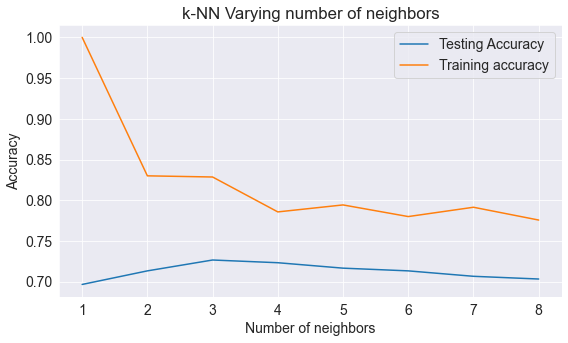

In [209]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [277]:
knn = KNeighborsClassifier(n_neighbors=2)
 
#Fit the model
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.7133333333333334

In [278]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred_KNN1 = knn.predict(x_test)

In [279]:
confusion_matrix(y_test,y_pred_KNN1)

array([[193,  16],
       [ 70,  21]], dtype=int64)

Text(0.5, 320.8, 'Predicted label')

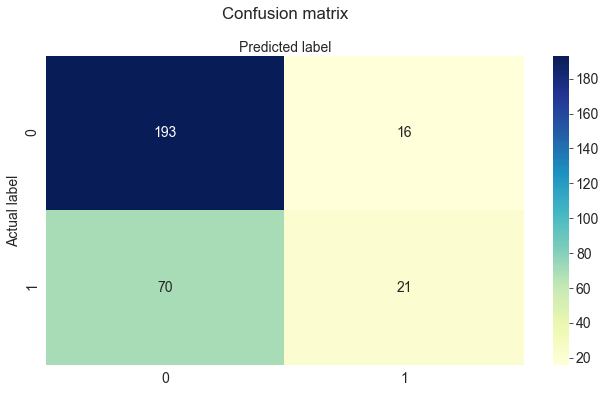

In [280]:
confusion_matrix_KNN = confusion_matrix(y_test, y_pred_KNN1)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_KNN), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [262]:
pd.crosstab(y_test, y_pred_KNN1, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,193,16,209
1,70,21,91
All,263,37,300


In [263]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_KNN1))

              precision    recall  f1-score   support

           0       0.73      0.92      0.82       209
           1       0.57      0.23      0.33        91

    accuracy                           0.71       300
   macro avg       0.65      0.58      0.57       300
weighted avg       0.68      0.71      0.67       300



In [264]:
y_pred_KNN1_proba = knn.predict_proba(x_test)[:,1]

In [265]:
from sklearn.metrics import roc_curve

In [266]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_KNN1_proba)

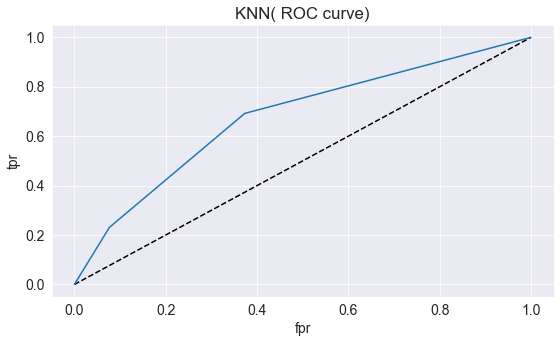

In [283]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN( ROC curve)')
plt.show()

In [284]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_KNN1_proba)

0.6761133603238867

In [290]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [291]:
knn_cv.best_params_

{'n_neighbors': 4}

In [292]:
knn_cv.best_score_

0.718